# Analysis of Q3 on the Maven Dependency Graph (MDG)

This document is the third chapter of a set of notebooks that accompany the paper "Breaking Bad? Semantic Versioning and Impact of Breaking Changes in Maven Central". In this chapter, we investigate Q3 and its corresponding null hypothesis on the Maven Dependency Graph (MDG).

**Q3**: What is the impact of BCs on clients?

**H$_3$**: BCs have a significant impact in terms of compilation errors in client systems.

---

## Table of Contents
<div class="toc" style="margin-top: 1em;">
    <ul class="toc-item">
        <li>
            <span><a href="#Setup" data-toc-modified-id="Setup">Setup</a></span>
        </li>
        <li>
            <span><a href="#Datasets" data-toc-modified-id="Datasets">Datasets</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Load-Datasets" data-toc-modified-id="Load-Datasets">Load Datasets</a></span>
                </li>
                <li>
                    <span><a href="#Clean-Datasets" data-toc-modified-id="Clean-Datasets">Clean Datasets</a></span>
                </li>
                <li>
                    <span><a href="#Finalize-Datasets" data-toc-modified-id="Finalize-Datasets">Finalize Datasets</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)">Exploratory Data Analysis (EDA)</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Pre-analysis-All-Dataset" data-toc-modified-id="Pre-analysis-All-Dataset">Pre-analysis All Dataset</a></span>
                </li>
                <li>
                    <span><a href="#Datasets-Summary" data-toc-modified-id="Datasets-Summary">Datasets Summary</a></span>
                </li>
                <li>
                    <span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics">Descriptive Statistics</a></span>
                </li>
                <li>
                    <span><a href="#Java-Versions" data-toc-modified-id="Java-Versions">Java Versions</a></span>
                </li>
                <li>
                    <span><a href="#Semantic-Versioning-Levels" data-toc-modified-id="Semantic-Versioning-Levels">Semantic Versioning Levels</a></span>
                </li>
                <li>
                    <span><a href="#Client-Release-Year" data-toc-modified-id="Client-Release-Year">Client Release Year</a></span>
                </li>
                <li>
                    <span><a href="#Detections-Density" data-toc-modified-id="Detections-Density">Detections Density</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Results" data-toc-modified-id="Results">Results</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Broken-Clients" data-toc-modified-id="Broken-Clients">Broken Clients</a></span>
                </li>
                <li>
                    <span><a href="#Number-of-Detections" data-toc-modified-id="Number-of-Detections">Number of Detections</a></span>
                </li>
                <li>
                    <span><a href="#Breaking-Change-Types" data-toc-modified-id="Breaking-Change-Types">Breaking Change Types</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Hypotheses-Testing" data-toc-modified-id="Hypotheses-Testing">Hypotheses Testing</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Usage-Ratios-and-Totals" data-toc-modified-id="Usage-Ratios-and-Totals">Usage Ratios and Totals</a></span>
                </li>
                <li>
                    <span><a href="#Usage-Summary" data-toc-modified-id="Usage-Summary">Usage Summary</a></span>
                </li>
                <li>
                    <span><a href="#Hypothesis-Tests" data-toc-modified-id="Hypothesis-Tests">Hypothesis Tests</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#EOF" data-toc-modified-id="EOF">EOF</a></span>
        </li>
    </ul>
</div>



---

## Setup

In [1]:
# Import required libraries
library(ggplot2)
library(ggthemes)
library(gridExtra)
library(rstatix)
library(effsize)

# Set theme
theme_set(theme_stata())

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Warning message:
“package ‘ggthemes’ was built under R version 3.5.2”


---

## Datasets

### Load Datasets

Our base datasets are:

  - The universe of all upgrades `upgrades.csv` ($N=293,817$)
  - The universe of all MAJOR upgrades `upgrades-major.csv` ($N=29,847$)
  - The universe of all MINOR upgrades `upgrades-minor.csv` ($N=111,830$)
  - The universe of all PATCH upgrades `upgrades-patch.csv` ($N=123,286$)
  - The universe of all DEV upgrades `upgrades-dev.csv` ($N=28,854$)

We then pick upgrades at random, with replacement, up to the sample size given by Cochran's formula ($z=0.99$, $e=0.01$, $p=0.5$), yielding five datasets on which we run the detection algorithm:

  - A sample of all upgrades detections `detections-upgrades.csv` ($N=15,701$)
  - A sample of MAJOR upgrades detections `detections-upgrades-major.csv` ($N=10,663$)
  - A sample of MINOR upgrades detections `detections-upgrades-minor.csv` ($N=14,445$)
  - A sample of PATCH upgrades detections `detections-upgrades-patch.csv` ($N=14,621$)
  - A sample of DEV upgrades detections `detections-upgrades-dev.csv` ($N=10,533$)

In [1]:
allDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))
majorDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-major.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))
minorDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-minor.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))
patchDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-patch.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))
devDs <- read.csv("../code/cypher-queries/data/gen/detections-upgrades-dev.csv", stringsAsFactors=FALSE, colClasses=c("cyear"="factor", "year"="factor", "java_version"="factor", "level"="factor"))

cat("Sample all upgrades:", nrow(allDs), "\n")
cat("Sample MAJOR upgrades:", nrow(majorDs), "\n")
cat("Sample MINOR upgrades:", nrow(minorDs), "\n")
cat("Sample PATCH upgrades:", nrow(patchDs), "\n")
cat("Sample DEV upgrades:", nrow(devDs), "\n")

Sample all upgrades: 15701 
Sample MAJOR upgrades: 10663 
Sample MINOR upgrades: 14445 
Sample PATCH upgrades: 14621 
Sample DEV upgrades: 10533 


In [2]:
head(majorDs)

,cgroup,cartifact,cv,cyear,lgroup,lartifact,lv1,lv2,level,year,⋯,fieldRemoved_unused,fieldRemovedInSuperclass_unused,fieldLessAccessible_unused,fieldMoreAccessible_unused,constructorRemoved_unused,constructorLessAccessible_unused,delta,detection,exception,time
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>
1,com.atlassian.ratelimit,ratelimit-asap,0.7,2017,javax.servlet,javax.servlet-api,3.1.0,4.0.0,MAJOR,2017,⋯,0,0,0,0,0,0,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/javax.servlet/javax.servlet-api/3.1.0_to_4.0.0.delta,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/detections/javax.servlet/javax.servlet-api/3.1.0_to_4.0.0.delta/com.atlassian.ratelimit_ratelimit-asap_0.7.detect,-1,5
2,org.apache.geronimo.modules,geronimo-jaxws-ejb-builder,2.2.1,2010,org.apache.geronimo.modules,geronimo-jaxws-builder,2.2.1,3.0.0,MAJOR,2012,⋯,5,0,0,0,4,0,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/org.apache.geronimo.modules/geronimo-jaxws-builder/2.2.1_to_3.0.0.delta,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/detections/org.apache.geronimo.modules/geronimo-jaxws-builder/2.2.1_to_3.0.0.delta/org.apache.geronimo.modules_geronimo-jaxws-ejb-builder_2.2.1.detect,-1,0
3,org.sonatype.nexus.plugins,nexus-indexer-lucene-plugin,2.4.0-09,2013,org.apache.maven.indexer,indexer-core,5.1.1,6.0.0,MAJOR,2017,⋯,5,0,24,4,13,0,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/org.apache.maven.indexer/indexer-core/5.1.1_to_6.0.0.delta,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/detections/org.apache.maven.indexer/indexer-core/5.1.1_to_6.0.0.delta/org.sonatype.nexus.plugins_nexus-indexer-lucene-plugin_2.4.0-09.detect,-1,7
4,sk.seges.corpis,corpis-domain-model-hibernate-support,1.2.2,2012,sk.seges.sesam,sesam-annotation-core-support,1.2.2,2.0.0,MAJOR,2014,⋯,2,0,0,3,11,1,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/sk.seges.sesam/sesam-annotation-core-support/1.2.2_to_2.0.0.delta,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/detections/sk.seges.sesam/sesam-annotation-core-support/1.2.2_to_2.0.0.delta/sk.seges.corpis_corpis-domain-model-hibernate-support_1.2.2.detect,-1,10
5,de.alpharogroup,user-init,3.12.0,2017,cglib,cglib,2.2.2,3.0,MAJOR,2013,⋯,0,0,0,0,0,0,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/cglib/cglib/2.2.2_to_3.0.delta,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/detections/cglib/cglib/2.2.2_to_3.0.delta/de.alpharogroup_user-init_3.12.0.detect,-1,12
6,org.apache.kafka,kafka-streams-examples,1.1.1,2018,org.apache.kafka,kafka-streams,1.1.1,2.0.0,MAJOR,2018,⋯,21,1,18,2,44,4,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/org.apache.kafka/kafka-streams/1.1.1_to_2.0.0.delta,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/detections/org.apache.kafka/kafka-streams/1.1.1_to_2.0.0.delta/org.apache.kafka_kafka-streams-examples_1.1.1.detect,-1,11


### Clean Datasets

In [3]:
# Removing unneeded changes
cleaning_numDetections <- function(ds) {
    ds$numDetections_original <- ds$numDetections
    
    # Removing:
    # - methodNowThrowsCheckedException
    # - classNowCheckedException
    # - fieldStaticAndOverridesStatic
    # - methodAbstractAddedInSuperclass
    # - methodAbstractAddedInImplementedInterface
    # - methodLessAccessibleThanInSuperclass
    # - fieldLessAccessibleThanInSuperclass
    # - fieldRemovedInSuperclass
    # - methodRemovedInSuperclass
    # - superclassModifiedIncompatible
    # - methodIsStaticAndOverridesNotStatic
    bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", 
         "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", 
         "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", 
         "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", 
         "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", 
         "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", 
         "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")
    
    numDetections <- rep(0, nrow(ds))
    for (bc in bcs) {
        numDetections <- numDetections + ds[[bc]]
    }
    
    ds$numDetections <- numDetections
    return (ds)
}


allDs <- cleaning_numDetections(allDs)
majorDs <- cleaning_numDetections(majorDs)
minorDs <- cleaning_numDetections(minorDs)
patchDs <- cleaning_numDetections(patchDs)
devDs <- cleaning_numDetections(devDs)

In [4]:
# Get broken clients
allDs$broken <- allDs$numDetections > 0
majorDs$broken <- majorDs$numDetections > 0
minorDs$broken <- minorDs$numDetections > 0
patchDs$broken <- patchDs$numDetections > 0
devDs$broken <- devDs$numDetections > 0

allBrokenDs <- subset(allDs, broken)
majorBrokenDs <- subset(majorDs, broken)
minorBrokenDs <- subset(minorDs, broken)
patchBrokenDs <- subset(patchDs, broken)
devBrokenDs <- subset(devDs, broken)

cat("Broken clients (all upgrades):", nrow(allBrokenDs), "\n")
cat("Broken clients (MAJOR upgrades):", nrow(majorBrokenDs), "\n")
cat("Broken clients (MINOR upgrades):", nrow(minorBrokenDs), "\n")
cat("Broken clients (PATCH upgrades):", nrow(patchBrokenDs), "\n")
cat("Broken clients (DEV upgrades):", nrow(devBrokenDs), "\n")

Broken clients (all upgrades): 1237 
Broken clients (MAJOR upgrades): 1250 
Broken clients (MINOR upgrades): 1130 
Broken clients (PATCH upgrades): 735 
Broken clients (DEV upgrades): 1772 


### Finalize Datasets

In [5]:
# Add used cases (breaking + non-breaking)
addUsedCases <- function(ds) {
    bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", "classNowCheckedException", "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", "methodNowThrowsCheckedException", "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")

    for (bc in bcs) {
        used  <- ds[[paste(bc, "_breaking", sep="")]] + 
        ds[[paste(bc, "_nonbreaking", sep="")]]

        ds$used = used
        names(ds)[names(ds) == "used"] <- paste(bc, "_used", sep="")
    }
}
    
addUsedCases(allDs)
addUsedCases(majorDs)
addUsedCases(minorDs)
addUsedCases(patchDs)
addUsedCases(devDs)

---

## Exploratory Data Analysis (EDA)

In [6]:
# Computes a density plot
# dataset: data frame with input data
# dim: vector with input data (column of the data frame)
# dim_label: name of the dimension 
# x_label: label of the x axis
# Returns a ggplot2 density plot
plot_dens_hist <- function(dataset, dim, dim_label, x_label, binw=30) {
    plot <- ggplot(dataset, aes(x=dim, y=..density..)) + 
        labs(title=sprintf("%s Density Histogram", dim_label),
             x=x_label,
             y="Density") +
        geom_histogram(binwidth=30) +
        geom_vline(aes(xintercept=median(dim)), 
                   linetype="dashed",
                   size=0.6)
    
    return(plot)
}

In [7]:
# Computes a density plot
# dataset: data frame with input data
# dim: vector with input data (column of the data frame)
# dim_label: name of the dimension 
# x_label: label of the x axis
# Returns a ggplot2 density plot
plot_dens_bar <- function(dataset, dim, dim_label, x_label) {
    plot <- ggplot(dataset, aes(x=dim, y=..prop.., group=1)) + 
        labs(title=sprintf("%s Density Histogram", dim_label),
             x=x_label,
             y="Density") +
        geom_bar() +
        ylim(0, 1) +
        theme_light()
    
    return(plot)
}

### Pre-analysis All Dataset

In [8]:
# Do we want to study the difference between internal/external clients? => We don't have internal clients
sprintf("There are %d external clients, %d internal clients", nrow(subset(allDs, allDs$cgroup != allDs$lgroup)), nrow(subset(allDs, allDs$cgroup == allDs$lgroup)))

# Do we study the same pairs <client, library> several times? => Yes
all <- nrow(allDs)
uniqueClients <- length(unique(paste(allDs$cgroup, allDs$cartifact)))
uniqueLibs <- length(unique(paste(allDs$lgroup, allDs$lartifact)))
uniquePairs <- length(unique(paste(allDs$cgroup, allDs$cartifact, allDs$lgroup, allDs$lartifact)))
sprintf("There are %d detections, %d unique clients, %d unique libraries, %d unique pairs", all, uniqueClients, uniqueLibs, uniquePairs)

# Do we have detections (even unused) for all BCs? => No
# Nothing for superclassModifiedIncompatible/methodLessAccessibleThanInSuperclass/fieldLessAccessibleThanInSuperclass (normal for the two first, but there are some fieldLessAccessibleThanInSuperclass in RQ1 so that's weird)
bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", "classNowCheckedException", "classLessAccessible", "superclassRemoved", "superclassAdded", "superclassModifiedIncompatible", "interfaceAdded", "interfaceRemoved", "methodRemoved", "methodRemovedInSuperclass", "methodLessAccessible", "methodLessAccessibleThanInSuperclass", "methodMoreAccessible", "methodIsStaticAndOverridesNotStatic", "methodReturnTypeChanged", "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", "methodNowThrowsCheckedException", "methodAbstractAddedToClass", "methodAbstractAddedInSuperclass", "methodAbstractAddedInImplementedInterface", "methodNewDefault", "methodAbstractNowDefault", "fieldStaticAndOverridesStatic", "fieldLessAccessibleThanInSuperclass", "fieldNowFinal", "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldRemovedInSuperclass", "fieldLessAccessible", "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")
for (bc in bcs) {
    allDetections <- sum(allDs[[bc]])
    unusedDetections <- sum(allDs[[paste(bc, "_unused", sep="")]])
    if (allDetections == 0 && unusedDetections == 0)
        print(sprintf("There are 0 detections and 0 unused detections for %s. It's not part of the dataset?", bc))
}

[1] "There are 12162 external clients, 3539 internal clients"

[1] "There are 15701 detections, 11566 unique clients, 2805 unique libraries, 14242 unique pairs"

[1] "There are 0 detections and 0 unused detections for superclassModifiedIncompatible. It's not part of the dataset?"
[1] "There are 0 detections and 0 unused detections for methodLessAccessibleThanInSuperclass. It's not part of the dataset?"
[1] "There are 0 detections and 0 unused detections for methodIsStaticAndOverridesNotStatic. It's not part of the dataset?"
[1] "There are 0 detections and 0 unused detections for fieldLessAccessibleThanInSuperclass. It's not part of the dataset?"


### Datasets Summary

In [9]:
summary(allDs)

    cgroup           cartifact              cv                cyear     
 Length:15701       Length:15701       Length:15701       2018   :3357  
 Class :character   Class :character   Class :character   2017   :3261  
 Mode  :character   Mode  :character   Mode  :character   2016   :2054  
                                                          2015   :1918  
                                                          2014   :1041  
                                                          2013   : 997  
                                                          (Other):3073  
    lgroup           lartifact             lv1                lv2           
 Length:15701       Length:15701       Length:15701       Length:15701      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [10]:
summary(majorDs)

    cgroup           cartifact              cv                cyear     
 Length:10663       Length:10663       Length:10663       2018   :2850  
 Class :character   Class :character   Class :character   2017   :2007  
 Mode  :character   Mode  :character   Mode  :character   2015   :1437  
                                                          2016   :1230  
                                                          2013   : 814  
                                                          2012   : 758  
                                                          (Other):1567  
    lgroup           lartifact             lv1                lv2           
 Length:10663       Length:10663       Length:10663       Length:10663      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [11]:
summary(minorDs)

    cgroup           cartifact              cv                cyear     
 Length:14445       Length:14445       Length:14445       2018   :3382  
 Class :character   Class :character   Class :character   2017   :3084  
 Mode  :character   Mode  :character   Mode  :character   2016   :1975  
                                                          2015   :1629  
                                                          2013   : 886  
                                                          2014   : 805  
                                                          (Other):2684  
    lgroup           lartifact             lv1                lv2           
 Length:14445       Length:14445       Length:14445       Length:14445      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [12]:
summary(patchDs)

    cgroup           cartifact              cv                cyear     
 Length:14621       Length:14621       Length:14621       2017   :2944  
 Class :character   Class :character   Class :character   2018   :2779  
 Mode  :character   Mode  :character   Mode  :character   2015   :1865  
                                                          2016   :1783  
                                                          2012   : 915  
                                                          2014   : 886  
                                                          (Other):3449  
    lgroup           lartifact             lv1                lv2           
 Length:14621       Length:14621       Length:14621       Length:14621      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [13]:
summary(devDs)

    cgroup           cartifact              cv                cyear     
 Length:10533       Length:10533       Length:10533       2017   :2258  
 Class :character   Class :character   Class :character   2016   :1742  
 Mode  :character   Mode  :character   Mode  :character   2015   :1710  
                                                          2018   :1438  
                                                          2014   :1013  
                                                          2013   : 897  
                                                          (Other):1475  
    lgroup           lartifact             lv1                lv2           
 Length:10533       Length:10533       Length:10533       Length:10533      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

### Descriptive Statistics

In [14]:
summary(allDs$declarations)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      59     206    1877     767  277986 

In [15]:
summary(allDs$api_declarations)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      36     136    1346     531  229639 

### Java Versions

Saving 7 x 7 in image



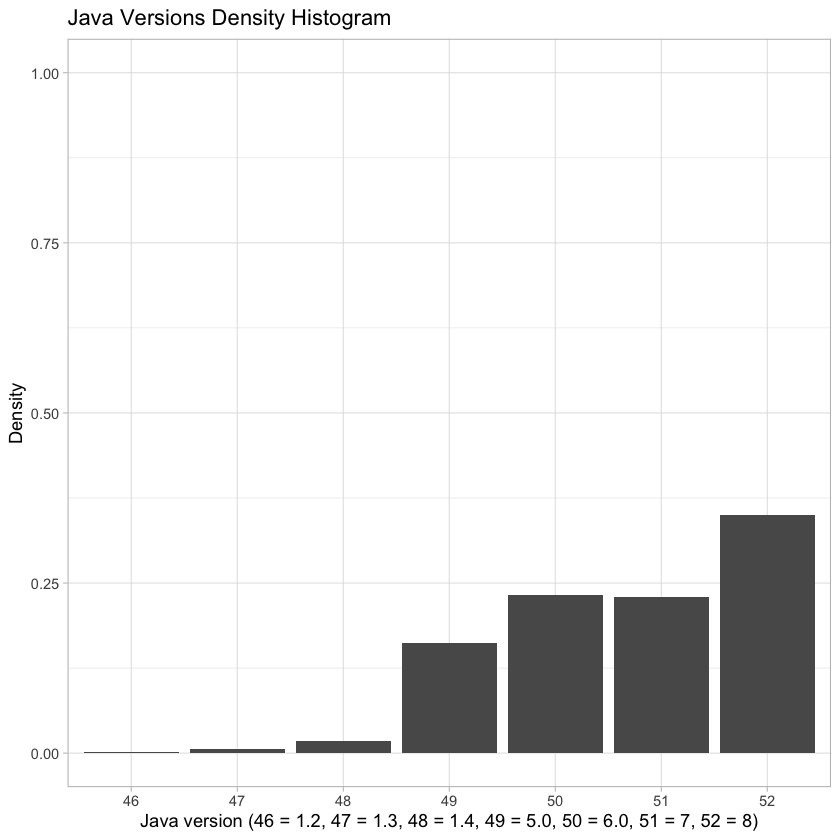

In [16]:
# 46 = 1.2, 47 = 1.3, 48 = 1.4, 49 = 5.0, 50 = 6.0, 51 = 7, 52 = 8, 53 = 9, 54 = 10, 196653 = 1.1
p <- plot_dens_bar(allDs, allDs$java_version, "Java Versions", "Java version (46 = 1.2, 47 = 1.3, 48 = 1.4, 49 = 5.0, 50 = 6.0, 51 = 7, 52 = 8)")

p
ggsave("figures/mdg-client-java-versions.pdf", p)

### Semantic Versioning Levels

Saving 7 x 7 in image



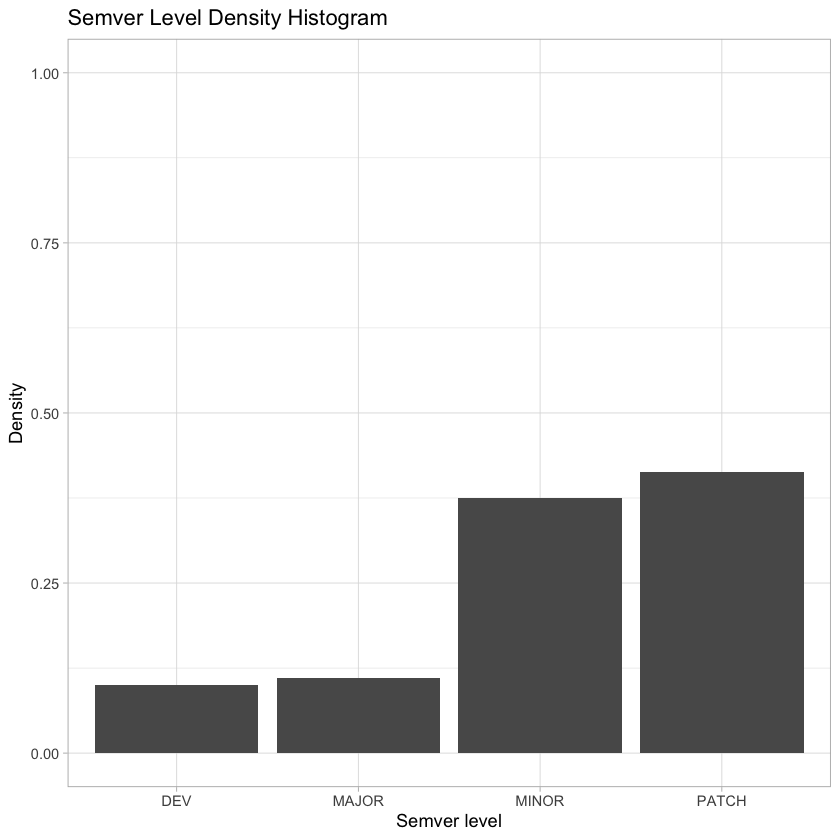

In [17]:
p <- plot_dens_bar(allDs, allDs$level, "Semver Level", "Semver level")

p
ggsave("figures/mdg-client-semver-levels.pdf", p)

### Client Release Year

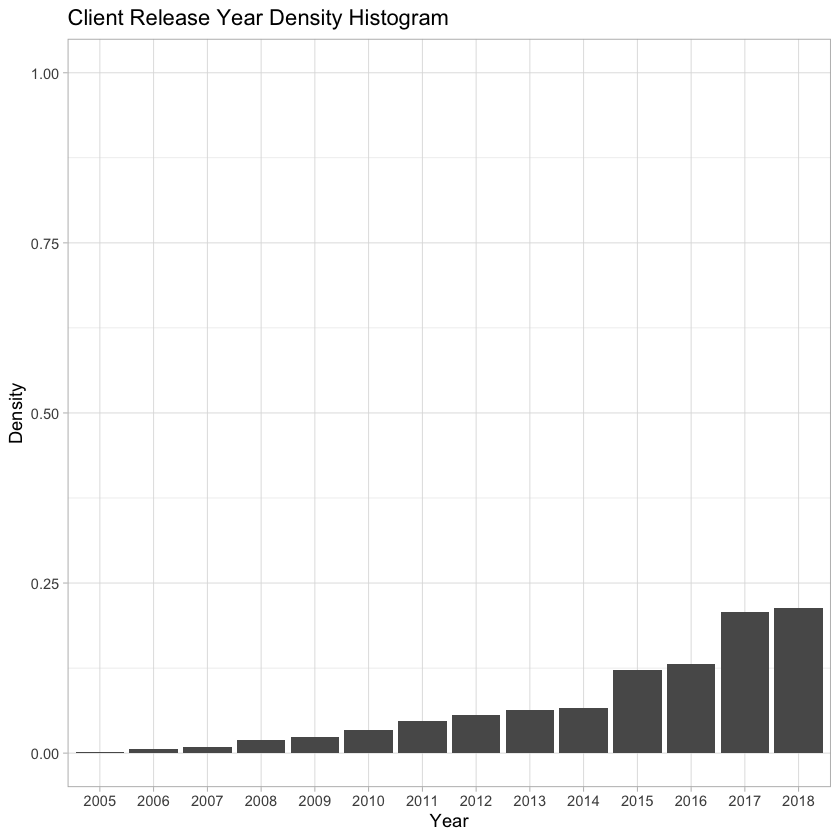

In [18]:
plot_dens_bar(allDs, allDs$cyear, "Client Release Year", "Year")

### Detections Density

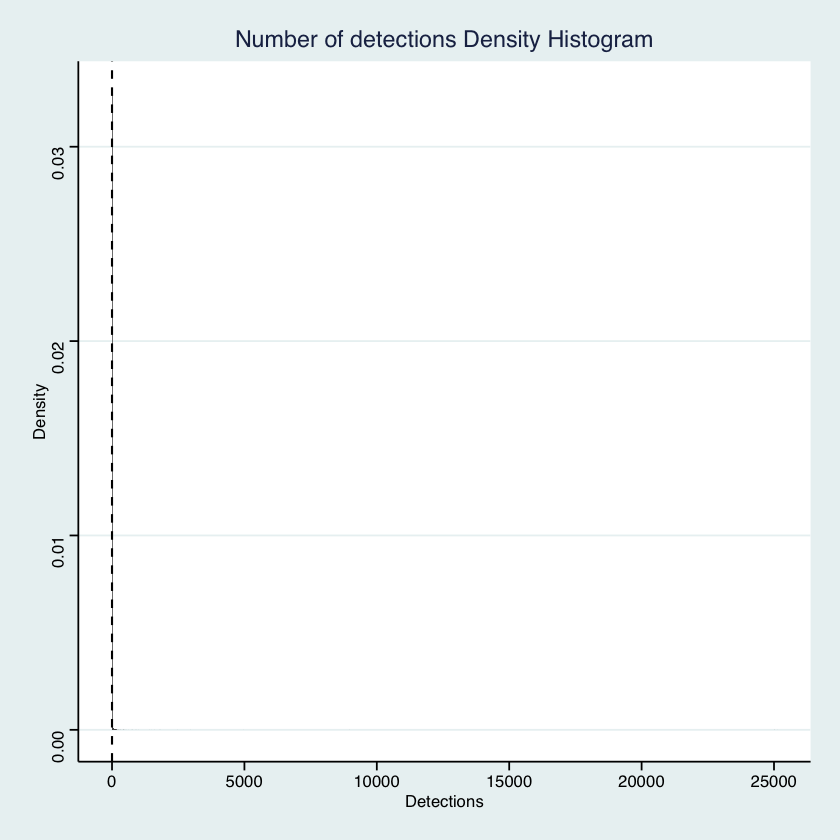

In [19]:
p <- plot_dens_hist(allDs, allDs$numDetections, "Number of detections", "Detections")
p

---

## Results

### Broken Clients

In [20]:
# Create broken clients data frame
breaking_upgrades <- data.frame(
    level = c("ALL", "MAJOR", "MINOR", "PATCH", "DEV"),
    number = c(nrow(allDs), nrow(majorDs), nrow(minorDs), nrow(patchDs), nrow(devDs)),
    broken = c(nrow(allBrokenDs),
               nrow(majorBrokenDs),
               nrow(minorBrokenDs),
               nrow(patchBrokenDs),
               nrow(devBrokenDs)),
    broken_ratio = c(nrow(allBrokenDs) / nrow(allDs),
                     nrow(majorBrokenDs) / nrow(majorDs),
                     nrow(minorBrokenDs) / nrow(minorDs),
                     nrow(patchBrokenDs) / nrow(patchDs),
                     nrow(devBrokenDs) / nrow(devDs)),
    detections = c(median(allBrokenDs$numDetections),
                   median(majorBrokenDs$numDetections),
                   median(minorBrokenDs$numDetections),
                   median(patchBrokenDs$numDetections),
                   median(devBrokenDs$numDetections))
)

breaking_upgrades

level,number,broken,broken_ratio,detections
<fct>,<int>,<int>,<dbl>,<dbl>
ALL,15701,1237,0.07878479,4.0
MAJOR,10663,1250,0.11722780,6.0
MINOR,14445,1130,0.07822776,3.5
PATCH,14621,735,0.05027016,3.0
DEV,10533,1772,0.16823317,4.0


In [21]:
dt <- subset(allDs, numDetections > 0)
summary(dt$numDetections)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     4.0   106.4    12.0 25113.0 

In [22]:
dt <- subset(majorDs, numDetections > 0)
summary(dt$numDetections)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     2.00     6.00    68.70    21.75 10920.00 

In [23]:
dt <- subset(minorDs, numDetections > 0)
summary(dt$numDetections)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     1.00     3.50    57.38    12.00 25005.00 

In [24]:
dt <- subset(patchDs, numDetections > 0)
summary(dt$numDetections)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    3.00   36.45   10.00 6039.00 

In [25]:
dt <- subset(devDs, numDetections > 0)
summary(dt$numDetections)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     2.0     4.0    41.3    13.0  7813.0 

Saving 7 x 7 in image



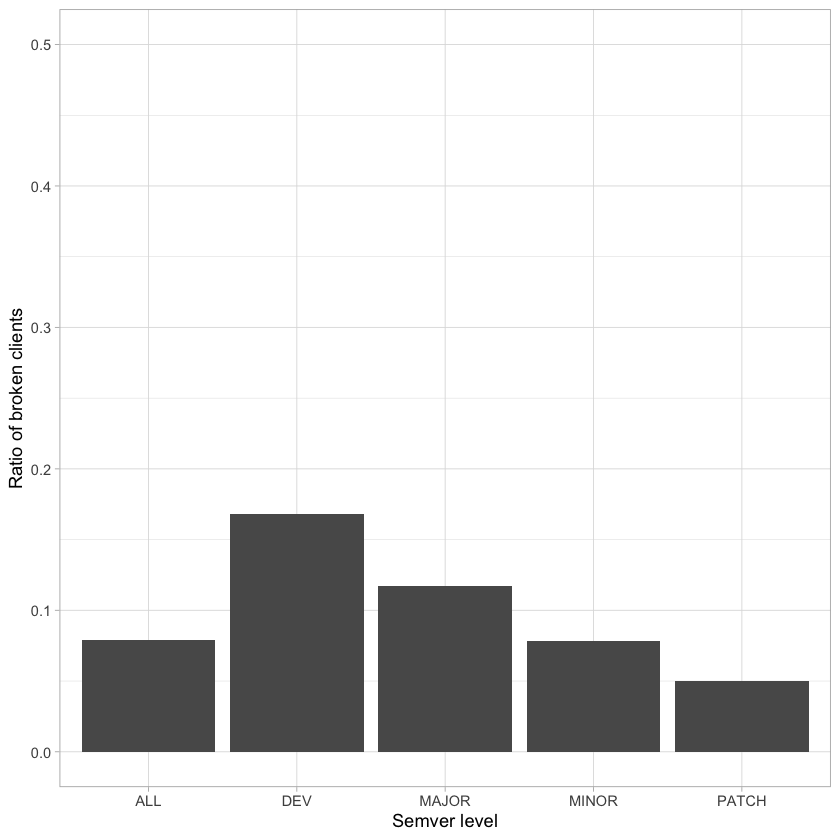

In [26]:
# Ratio of broken clients per semver level
p <- ggplot(breaking_upgrades, aes(x=level, y=broken_ratio)) +
        labs(x="Semver level", y="Ratio of broken clients") +
        geom_bar(stat="identity") +
        ylim(0, 0.5) +
        theme_light()

p
ggsave("figures/mdg-broken_ratio.pdf", p)

### Number of Detections

In [27]:
# Compute median value
med_fun <- function(x) {
    return (data.frame(y=median(x), label = round(10^median(x), digits=2)))
}

# Compute first quantile value
fstq_fun <- function(x) {
    return (data.frame(y=quantile(x)[2], label = round(10^(quantile(x)[2]), digits=2)))
}

# Compute third quantile value
thrq_fun <- function(x) {
    return (data.frame(y=quantile(x)[4], label = round(10^(quantile(x)[4]), digits=2)))
}

In [28]:
# Create dataset with number of detections per client per semver level
dt <- subset(allDs, numDetections > 0)

semver_dt <- data.frame(level=rep('MAJOR', nrow(subset(majorDs, numDetections > 0))), 
                    numDetections=subset(majorDs, numDetections > 0)$numDetections)

minor <- data.frame(level=rep('MINOR', nrow(subset(minorDs, numDetections > 0))), 
                    numDetections=subset(minorDs, numDetections > 0)$numDetections)

patch <- data.frame(level=rep('PATCH', nrow(subset(patchDs, numDetections > 0))), 
                    numDetections=subset(patchDs, numDetections > 0)$numDetections)

dev <- data.frame(level=rep('DEV', nrow(subset(devDs, numDetections > 0))), 
                    numDetections=subset(devDs, numDetections > 0)$numDetections)

semver_dt <- rbind(semver_dt, minor)
semver_dt <- rbind(semver_dt, patch)
semver_dt <- rbind(semver_dt, dev)

semver_dt$level <- factor(semver_dt$level, levels=c("MAJOR", "MINOR", "PATCH", "DEV"))

Saving 7 x 7 in image



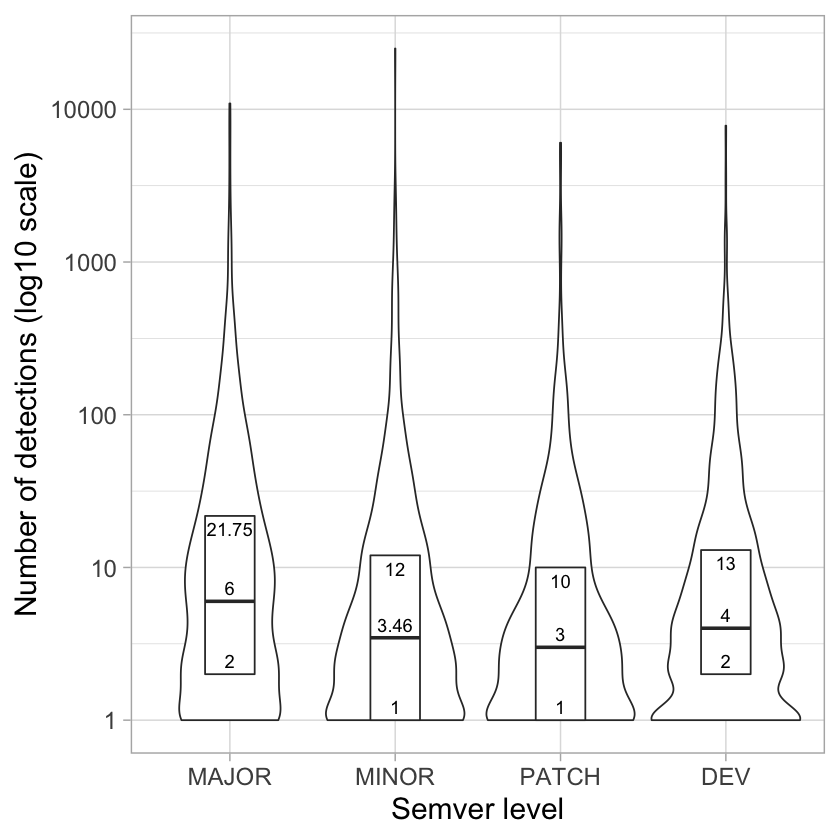

In [29]:
# Number of detections per broken client per semver level
p <- ggplot(semver_dt, aes(x=level, y=numDetections)) +
    labs(x="Semver level", y="Number of detections (log10 scale)") +
    geom_violin() +
    geom_boxplot(width=0.3, outlier.shape = NA, coef=0) +
    stat_summary(fun.data = med_fun, geom = "text", vjust=-0.5) +
    stat_summary(fun.data = fstq_fun, geom = "text", vjust=-0.5) +
    stat_summary(fun.data = thrq_fun, geom = "text", vjust=+1.5) +
    scale_y_continuous(trans="log10") +
    theme_light(base_size=18)

p
ggsave("figures/mdg-detections-number.pdf", p)

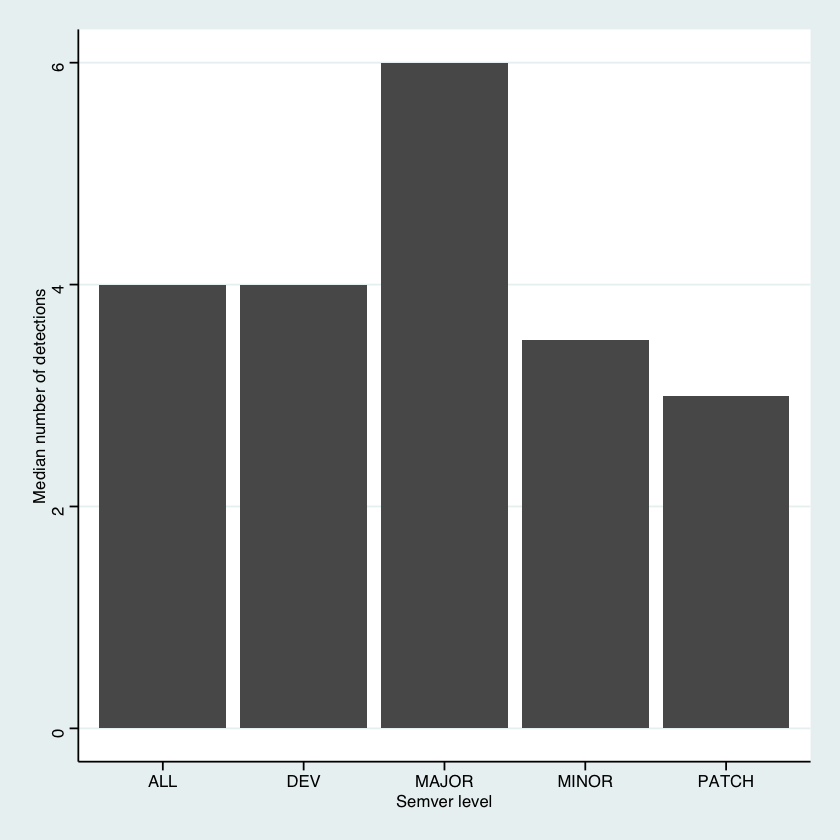

In [30]:
# Median number of detections per semver level
p <- ggplot(breaking_upgrades, aes(x = level, y = detections)) +
    labs(x="Semver level", y="Median number of detections") +
        geom_bar(stat="identity")

p

In [31]:
# Print number of detections per type of usage
printDetections <- function(name, ds) {
    # Split dataset, ignoring annotationDeprecatedAdded and methodAddedToPublicClass
    detectionsAll      <- ds[c(19:42, 44:61)]     # One detection = one occurence of a change breaking something in client code
    detectionsStable   <- ds[c(67:90, 92:109)]    #   => where the change comes from the stable part of the API
    detectionsUnstable <- ds[c(115:138, 140:157)] #   =>                                 unstable
    changed            <- ds[c(159:182, 184:201)] # Number of breaking changes in the current delta
    usageBreaking      <- ds[c(203:226, 228:245)] #   => those that break at least one location in client code
    usageNonBreaking   <- ds[c(247:270, 272:289)] #   => those that do not break any location even though they're used
    usageUnused        <- ds[c(291:314, 316:333)] #   => those that are not used

    sprintf("[%s] All: %d Stable: %d Unstable: %d Changed: %d Breaking: %d Non-breaking: %d Unused: %d",
            name,
            sum(rowSums(detectionsAll)),
            sum(rowSums(detectionsStable)),
            sum(rowSums(detectionsUnstable)),
            sum(rowSums(changed)),
            sum(rowSums(usageBreaking)),
            sum(rowSums(usageNonBreaking)),
            sum(rowSums(usageUnused)))
}

printDetections("ALL", allDs)
printDetections("MAJOR", majorDs)
printDetections("MINOR", minorDs)
printDetections("PATCH", patchDs)
printDetections("DEV", devDs)

[1] "[ALL] All: 131834 Stable: 108149 Unstable: 23685 Changed: 1293548 Breaking: 17753 Non-breaking: 10298 Unused: 1266965"

[1] "[MAJOR] All: 86027 Stable: 79511 Unstable: 6516 Changed: 2259049 Breaking: 16537 Non-breaking: 12117 Unused: 2231958"

[1] "[MINOR] All: 65022 Stable: 54473 Unstable: 10549 Changed: 1018572 Breaking: 10140 Non-breaking: 6640 Unused: 1003180"

[1] "[PATCH] All: 26864 Stable: 26313 Unstable: 551 Changed: 450416 Breaking: 4773 Non-breaking: 3044 Unused: 443368"

[1] "[DEV] All: 73944 Stable: 72321 Unstable: 1623 Changed: 990091 Breaking: 16229 Non-breaking: 5639 Unused: 969887"

### Breaking Change Types

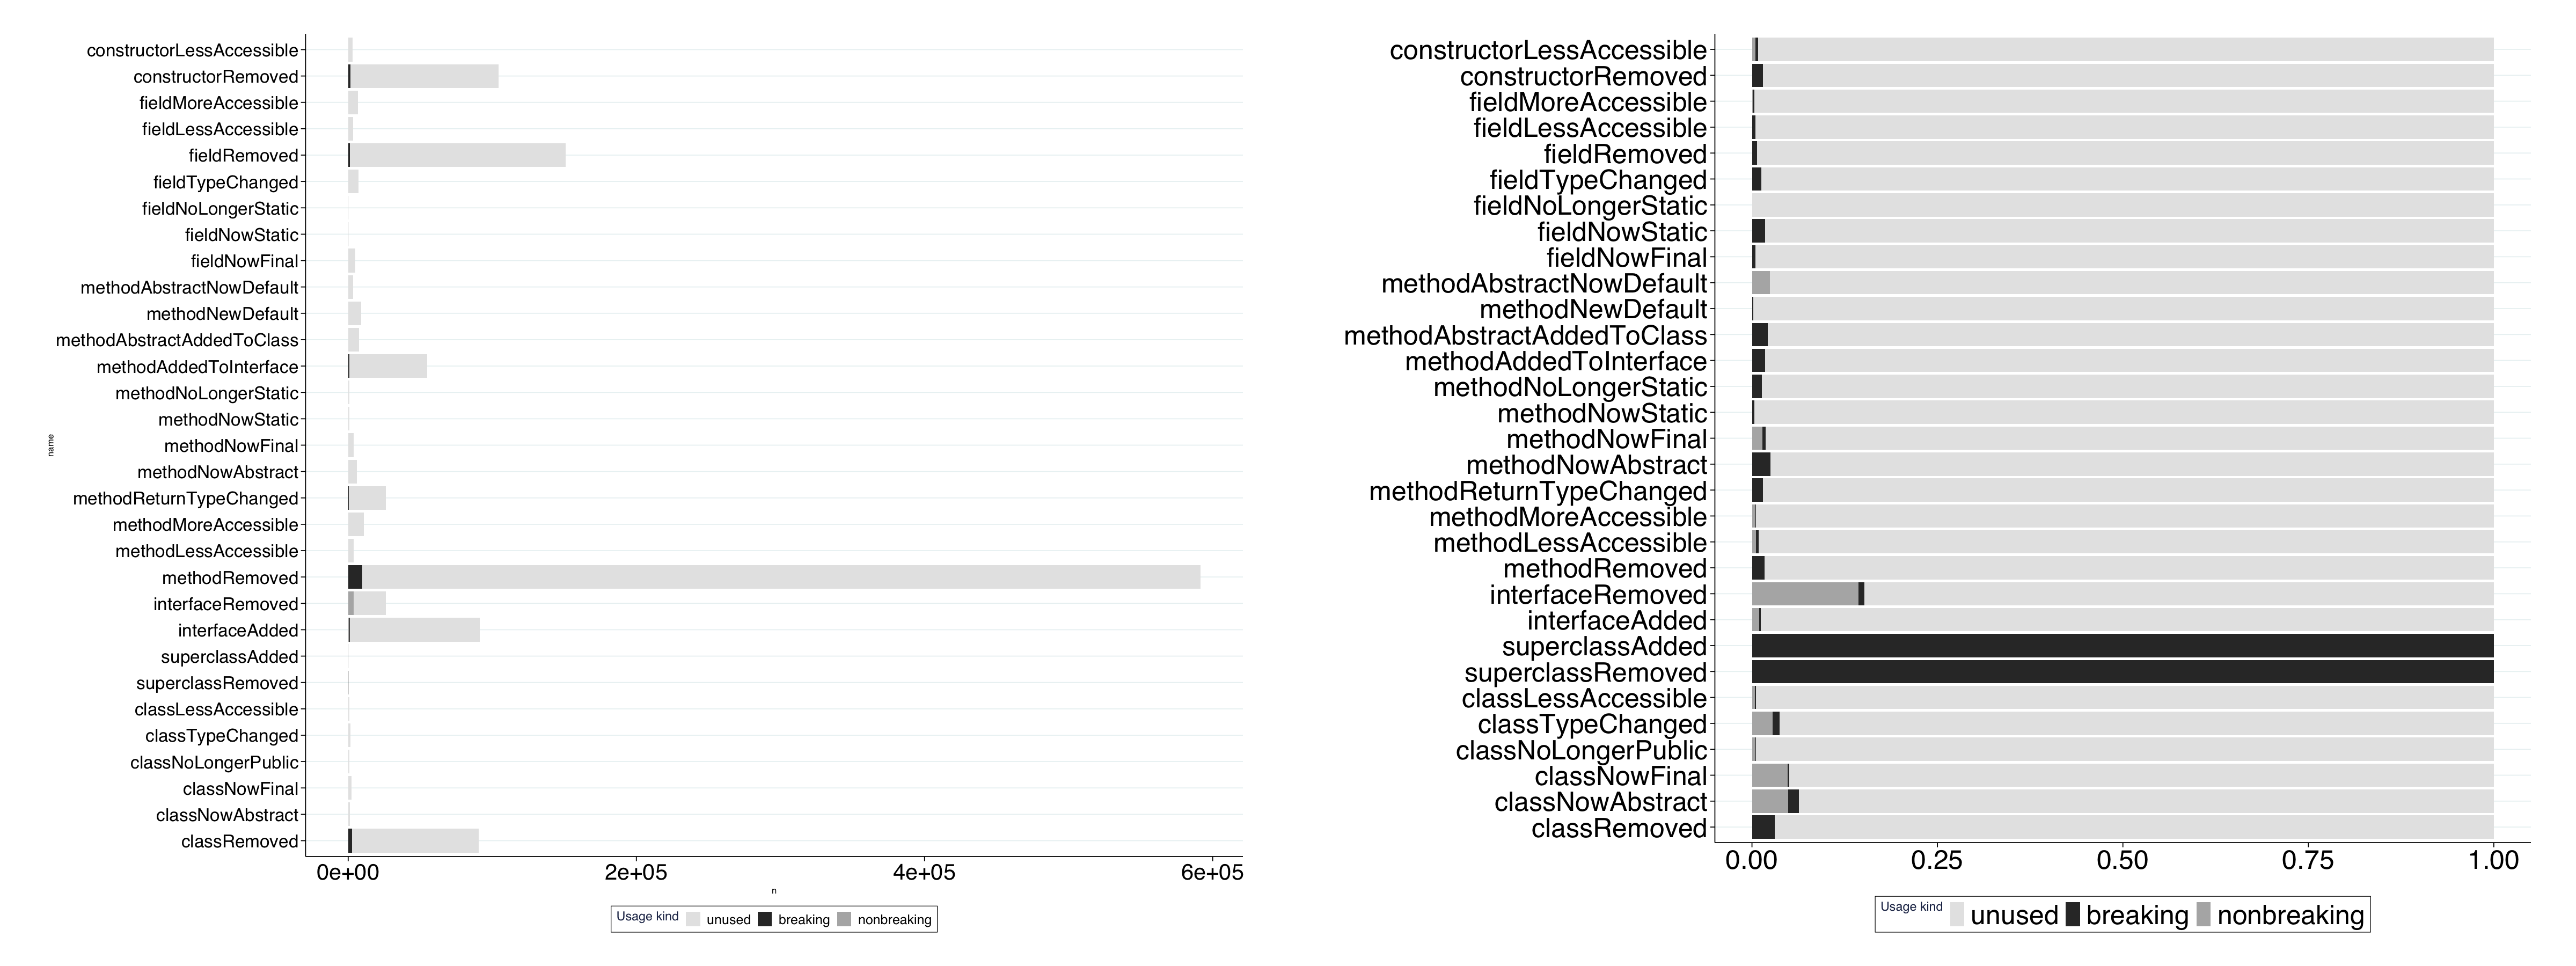

In [32]:
# Computing stats per BC type for all use types

# Removing:
# - methodNowThrowsCheckedException
# - classNowCheckedException
# - fieldStaticAndOverridesStatic
# - methodAbstractAddedInSuperclass
# - methodAbstractAddedInImplementedInterface
# - methodLessAccessibleThanInSuperclass
# - fieldLessAccessibleThanInSuperclass
# - fieldRemovedInSuperclass
# - methodRemovedInSuperclass
# - superclassModifiedIncompatible
# - methodIsStaticAndOverridesNotStatic
bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", 
         "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", 
         "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", 
         "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", 
         "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", 
         "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", 
         "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")

barstats <- data.frame(
    name = factor(),
    type = factor(),
    n = numeric()
)

for (bc in bcs) {
    t  <- sum(allDs[[paste(bc, "", sep="")]])
    s  <- sum(allDs[[paste(bc, "_stable", sep="")]])
    un <- sum(allDs[[paste(bc, "_unstable", sep="")]])
    u  <- sum(allDs[[paste(bc, "_unused", sep="")]])
    b  <- sum(allDs[[paste(bc, "_breaking", sep="")]])
    nb <- sum(allDs[[paste(bc, "_nonbreaking", sep="")]])
    c  <- sum(allDs[[paste(bc, "_changed", sep="")]])

    if (u + b + nb > 0) { # superclassModifiedIncompatible/methodLessAccessibleThanInSuperclass/fieldLessAccessibleThanInSuperclass should be filtered out
        barstats <- rbind(barstats, data.frame(name = bc, type = "unused", n = u))
        barstats <- rbind(barstats, data.frame(name = bc, type = "breaking", n = b))
        barstats <- rbind(barstats, data.frame(name = bc, type = "nonbreaking", n = nb))
    } else { print(sprintf("%s",bc)) }
    
    nChanged <- nrow(subset(allDs, allDs[[paste(bc, "_changed", sep="")]] > 0))
    nBroken  <- nrow(subset(allDs, allDs[[paste(bc, "_breaking", sep="")]] > 0))
}

bplot <- ggplot(barstats, aes(fill = type, x = name, y = n)) +
    geom_bar(position="stack", stat="identity") +
    coord_flip() +
    theme(axis.text.y = element_text(angle = 0)) +
    scale_fill_manual("Usage kind", values = c("breaking" = "gray20", "nonbreaking" = "gray70", "unused" = "gray90")) +
    theme(axis.text.x = element_text(size=25), axis.text.y = element_text(size=20), 
          legend.text = element_text(size = 15), plot.background = element_rect(fill = "white"))

splot <- ggplot(barstats, aes(fill = type, x = name, y = n)) +
    labs(x="", y="") +
    geom_bar(position="fill", stat="identity") +
    coord_flip() +
    theme(axis.text.y = element_text(angle = 0)) +
    scale_fill_manual("Usage kind", values = c("breaking" = "gray20", "nonbreaking" = "gray70", "unused" = "gray90")) +
    theme(axis.text.x = element_text(size=30), axis.text.y = element_text(size=30), 
          legend.text = element_text(size=30), plot.background = element_rect(fill = "white"),
          plot.title = element_text(size=30, hjust=0, color="black"))

options(repr.plot.width=40, repr.plot.height=15)
grid.arrange(bplot, splot, ncol=2, nrow=1)

ggsave("figures/mdg-bcs-impact.pdf", splot, width=20, height=18)

In [33]:
# Check superclass added and removed cases
sa <- subset(allDs, superclassAdded > 0)
sr <- subset(allDs, superclassRemoved > 0)

bc <- "superclassAdded"
sprintf("[%s] %d artefacts impacting %d client declarations", bc,
       nrow(sa), sum(allDs[[bc]]))

bc <- "superclassRemoved"
sprintf("[%s] %d artefacts impacting %d client declarations", bc,
       nrow(sa), sum(allDs[[bc]]))

[1] "[superclassAdded] 21 artefacts impacting 55 client declarations"

[1] "[superclassRemoved] 21 artefacts impacting 2058 client declarations"

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


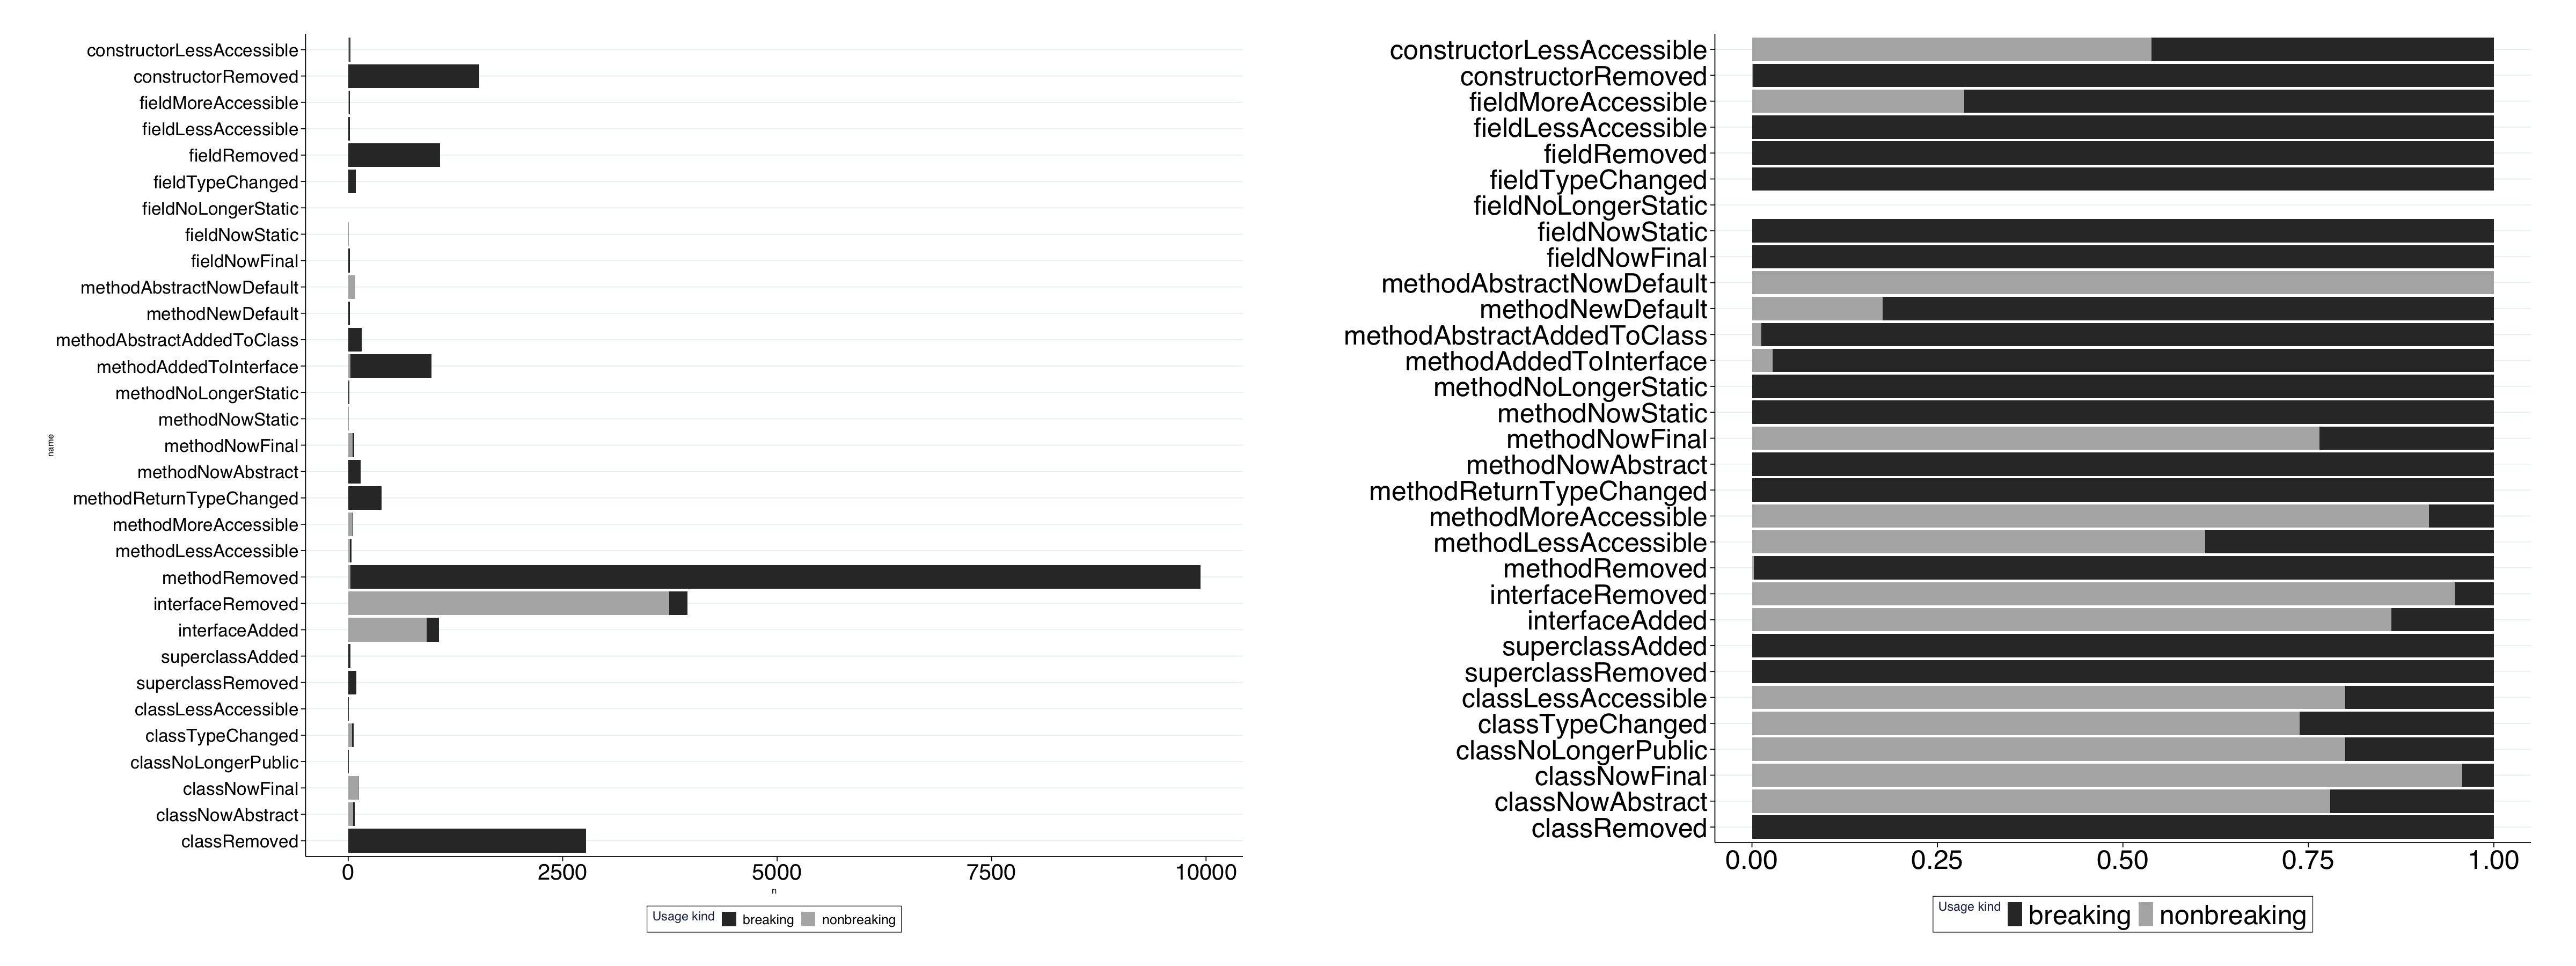

In [34]:
# Computing stats per BC type for breaking and non-breaking use types

# Stats per BCs
# Removing:
# - methodNowThrowsCheckedException
# - classNowCheckedException
# - fieldStaticAndOverridesStatic
# - methodAbstractAddedInSuperclass
# - methodAbstractAddedInImplementedInterface
# - methodLessAccessibleThanInSuperclass
# - fieldLessAccessibleThanInSuperclass
# - fieldRemovedInSuperclass
# - methodRemovedInSuperclass
# - superclassModifiedIncompatible
# - methodIsStaticAndOverridesNotStatic
bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", 
         "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", 
         "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", 
         "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", 
         "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", 
         "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", 
         "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")

barstats <- data.frame(
    name = factor(),
    type = factor(),
    n = numeric()
)

for (bc in bcs) {
    t  <- sum(allDs[[paste(bc, "", sep="")]])
    s  <- sum(allDs[[paste(bc, "_stable", sep="")]])
    un <- sum(allDs[[paste(bc, "_unstable", sep="")]])
    u  <- sum(allDs[[paste(bc, "_unused", sep="")]])
    b  <- sum(allDs[[paste(bc, "_breaking", sep="")]])
    nb <- sum(allDs[[paste(bc, "_nonbreaking", sep="")]])
    c  <- sum(allDs[[paste(bc, "_changed", sep="")]])

    if (u + b + nb > 0) { # superclassModifiedIncompatible/methodLessAccessibleThanInSuperclass/fieldLessAccessibleThanInSuperclass should be filtered out
        barstats <- rbind(barstats, data.frame(name = bc, type = "breaking", n = b))
        barstats <- rbind(barstats, data.frame(name = bc, type = "nonbreaking", n = nb))
    } else { print(sprintf("%s",bc)) }
    
    nChanged <- nrow(subset(allDs, allDs[[paste(bc, "_changed", sep="")]] > 0))
    nBroken  <- nrow(subset(allDs, allDs[[paste(bc, "_breaking", sep="")]] > 0))
}

bplot <- ggplot(barstats, aes(fill = type, x = name, y = n)) +
    geom_bar(position="stack", stat="identity") +
    coord_flip() +
    theme(axis.text.y = element_text(angle = 0)) +
    scale_fill_manual("Usage kind", values = c("breaking" = "gray20", "nonbreaking" = "gray70")) +
    theme(axis.text.x = element_text(size=25), axis.text.y = element_text(size=20), 
          legend.text = element_text(size = 15), plot.background = element_rect(fill = "white"))

splot <- ggplot(barstats, aes(fill = type, x = name, y = n)) +
    labs(x="", y="") +
    geom_bar(position="fill", stat="identity") +
    coord_flip() +
    theme(axis.text.y = element_text(angle = 0)) +
    scale_fill_manual("Usage kind", values = c("breaking" = "gray20", "nonbreaking" = "gray70")) +
    theme(axis.text.x = element_text(size=30), axis.text.y = element_text(size=30), 
          legend.text = element_text(size=30), plot.background = element_rect(fill = "white"),
          plot.title = element_text(size=30, hjust=0, color="black"))

options(repr.plot.width=40, repr.plot.height=15)
grid.arrange(bplot, splot, ncol=2, nrow=1)

ggsave("figures/mdg-bcs-used-impact.pdf", splot, width=20, height=18)

---

## Hypotheses Testing

### Usage Ratios and Totals

In [35]:
# Compute usage ratios and totals
compute_accums <- function(ds) {
    # Removing:
    # - methodNowThrowsCheckedException
    # - classNowCheckedException
    # - fieldStaticAndOverridesStatic
    # - methodAbstractAddedInSuperclass
    # - methodAbstractAddedInImplementedInterface
    # - methodLessAccessibleThanInSuperclass
    # - fieldLessAccessibleThanInSuperclass
    # - fieldRemovedInSuperclass
    # - methodRemovedInSuperclass
    # - superclassModifiedIncompatible
    # - methodIsStaticAndOverridesNotStatic
    bcs <- c("classRemoved", "classNowAbstract", "classNowFinal", "classNoLongerPublic", "classTypeChanged", 
             "classLessAccessible", "superclassRemoved", "superclassAdded", "interfaceAdded", "interfaceRemoved", 
             "methodRemoved", "methodLessAccessible", "methodMoreAccessible", "methodReturnTypeChanged", 
             "methodNowAbstract", "methodNowFinal", "methodNowStatic", "methodNoLongerStatic", "methodAddedToInterface", 
             "methodAbstractAddedToClass", "methodNewDefault", "methodAbstractNowDefault", "fieldNowFinal", 
             "fieldNowStatic", "fieldNoLongerStatic", "fieldTypeChanged", "fieldRemoved", "fieldLessAccessible", 
             "fieldMoreAccessible", "constructorRemoved", "constructorLessAccessible")

    # Initialize vector
    breaking <- rep(0, nrow(ds))
    nonbreaking <- rep(0, nrow(ds))
    unused <- rep(0, nrow(ds))
    changed <- rep(0, nrow(ds))

    # Add cases from all BCs
    for (bc in bcs) {
        breaking <- breaking + ds[[paste(bc, "_breaking", sep="")]]
        nonbreaking <- nonbreaking + ds[[paste(bc, "_nonbreaking", sep="")]]
        unused <- unused + ds[[paste(bc, "_unused", sep="")]]
        changed <- changed + ds[[paste(bc, "_changed", sep="")]]
    }
    
    ds$num_changed <- changed
    ds$num_breaking <- breaking
    ds$num_nonbreaking <- nonbreaking
    ds$num_unused <- unused
    ds$num_used <- breaking + nonbreaking
    ds$ratio_breaking <- ifelse(ds$num_changed != 0, ds$num_breaking / ds$num_changed, 0)
    ds$ratio_used_breaking <- ifelse(ds$num_used != 0, ds$num_breaking / ds$num_used, 0)
    ds$ratio_used_nonbreaking <- ifelse(ds$num_used != 0, ds$num_nonbreaking / ds$num_used, 0) 
    
    return (ds)
}

In [36]:
# Extract vectors per level
majorDs <- compute_accums(majorDs)
minorDs <- compute_accums(minorDs)
patchDs <- compute_accums(patchDs)
devDs <- compute_accums(devDs)
allDs <- compute_accums(allDs)

### Usage Summary

In [37]:
summary(majorDs$ratio_used_breaking)
summary(majorDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.08895 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.196   0.000   1.000 

In [38]:
summary(minorDs$ratio_used_breaking)
summary(minorDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.06273 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1051  0.0000  1.0000 

In [39]:
summary(patchDs$ratio_used_breaking)
summary(patchDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.04358 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.05334 0.00000 1.00000 

In [40]:
summary(devDs$ratio_used_breaking)
summary(devDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1446  0.0000  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09686 0.00000 1.00000 

In [41]:
summary(allDs$ratio_used_breaking)
summary(allDs$ratio_used_nonbreaking)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.06537 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09647 0.00000 1.00000 

### Hypothesis Tests

In [42]:
# Function to reject a test
reject_null_h <- function(p_value) {
    return (p_value < alpha)
}

#### Broken Clients: Pearson's $X^2$ Test

We use the Pearson's $X^2$ test to check if the proportion of broken clients is significantly different among the four semver levels. The Pearson's $X^2$ test is a non-parmetric test that does not assume normality.

**H$_0$:** The proportion of broken clients is the same across each semver level of library upgrades.

In [43]:
h_0 = "the proportion of broken clients is the same across each semver level of library upgrades"

In [44]:
# Set test alpha
alpha = 0.01

In [45]:
# Chi squuare test results
brokenTable <- as.table(rbind(
    c(nrow(majorDs) - nrow(majorBrokenDs), nrow(majorBrokenDs)),
    c(nrow(minorDs) - nrow(minorBrokenDs), nrow(minorBrokenDs)),
    c(nrow(patchDs) - nrow(patchBrokenDs), nrow(patchBrokenDs)),
    c(nrow(devDs) - nrow(devBrokenDs), nrow(devBrokenDs))
))
                        
dimnames(brokenTable) <- list(level=c("Major","Minor","Patch","Dev"), state=c("Not broken","Broken"))

test <- chisq.test(brokenTable)
print(test)


	Pearson's Chi-squared test

data:  brokenTable
X-squared = 1080.3, df = 3, p-value < 2.2e-16



In [46]:
# Conclusion
reject = reject_null_h(test$p.value)
noquote(sprintf('Reject null hypothesis (i.e. %s)? %s', h_0, ifelse(reject, 'Yes', 'No')))

[1] Reject null hypothesis (i.e. the proportion of broken clients is the same across each semver level of library upgrades)? Yes

#### Broken Clients: Fisher’s Exact Tests

We use Fisher's exact test to compare independent pairs of semver levels. We also need to adjust the resulting p-values using the Holm-Bonferroni correction.

**H$_0$:** The proportion of broken clients is the same between the two semver levels.

In [47]:
h_0 = "the proportion of broken clients is the same between the two semver levels"

In [48]:
print("Major vs minor")
major_minor_table <- as.table(rbind(
    c(nrow(majorDs) - nrow(majorBrokenDs), nrow(majorBrokenDs)),
    c(nrow(minorDs) - nrow(minorBrokenDs), nrow(minorBrokenDs))
))
dimnames(major_minor_table) <- list(level=c("Major","Minor"), state=c("Not broken","Broken"))
(major_minor_test <- fisher.test(major_minor_table))

print("Major vs patch")
major_patch_table <- as.table(rbind(
    c(nrow(majorDs) - nrow(majorBrokenDs), nrow(majorBrokenDs)),
    c(nrow(patchDs) - nrow(patchBrokenDs), nrow(patchBrokenDs))
))
dimnames(major_patch_table) <- list(level=c("Major","Patch"), state=c("Not broken","Broken"))
(major_patch_test <- fisher.test(major_patch_table))

print("Major vs dev")
major_dev_table <- as.table(rbind(
    c(nrow(majorDs) - nrow(majorBrokenDs), nrow(majorBrokenDs)),
    c(nrow(devDs) - nrow(devBrokenDs), nrow(devBrokenDs))
))
dimnames(major_dev_table) <- list(level=c("Major","Dev"), state=c("Not broken","Broken"))
(major_dev_test <- fisher.test(major_dev_table))

print("Minor vs patch")
minor_patch_table <- as.table(rbind(
    c(nrow(minorDs) - nrow(minorBrokenDs), nrow(minorBrokenDs)),
    c(nrow(patchDs) - nrow(patchBrokenDs), nrow(patchBrokenDs))
))
dimnames(minor_patch_table) <- list(level=c("Minor","Patch"), state=c("Not broken","Broken"))
(minor_patch_test <- fisher.test(minor_patch_table))

print("Minor vs dev")
minor_dev_table <- as.table(rbind(
    c(nrow(minorDs) - nrow(minorBrokenDs), nrow(minorBrokenDs)),
    c(nrow(devDs) - nrow(devBrokenDs), nrow(devBrokenDs))
))
dimnames(minor_dev_table) <- list(level=c("Minor","Dev"), state=c("Not broken","Broken"))
(minor_dev_test <- fisher.test(minor_dev_table))

print("Patch vs dev")
patch_dev_table <- as.table(rbind(
    c(nrow(patchDs) - nrow(patchBrokenDs), nrow(patchBrokenDs)),
    c(nrow(devDs) - nrow(devBrokenDs), nrow(devBrokenDs))
))
dimnames(patch_dev_table) <- list(level=c("Patch","Dev"), state=c("Not broken","Broken"))
(patch_dev_test <- fisher.test(patch_dev_table))

[1] "Major vs minor"



	Fisher's Exact Test for Count Data

data:  major_minor_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5866337 0.6961968
sample estimates:
odds ratio 
  0.639108 


[1] "Major vs patch"



	Fisher's Exact Test for Count Data

data:  major_patch_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3620486 0.4386516
sample estimates:
odds ratio 
 0.3986048 


[1] "Major vs dev"



	Fisher's Exact Test for Count Data

data:  major_dev_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.407775 1.648190
sample estimates:
odds ratio 
  1.523051 


[1] "Minor vs patch"



	Fisher's Exact Test for Count Data

data:  minor_patch_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5659024 0.6871595
sample estimates:
odds ratio 
 0.6237115 


[1] "Minor vs dev"



	Fisher's Exact Test for Count Data

data:  minor_dev_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.199839 2.582509
sample estimates:
odds ratio 
  2.383195 


[1] "Patch vs dev"



	Fisher's Exact Test for Count Data

data:  patch_dev_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 3.489335 4.186962
sample estimates:
odds ratio 
    3.8214 


In [49]:
# Perform Holm-Bonferroni correction
print("Raw p-values")
p_values <- c(major_minor_test$p.value, major_patch_test$p.value, major_dev_test$p.value, minor_patch_test$p.value, minor_dev_test$p.value, patch_dev_test$p.value)
names(p_values) <- c("Major vs minor", "Major vs patch", "Major vs dev", "Minor vs patch", "Minor vs dev", "Patch vs dev")
print(p_values)

print("Adjusted p-values")
p_values_adj <- p.adjust(p_values, method = "holm")
print(p_values_adj)

print("Rejects H0")
print(p_values_adj < alpha)

[1] "Raw p-values"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
  3.725528e-25   7.547448e-84   2.112376e-26   1.801086e-22  4.259014e-105 
  Patch vs dev 
 2.282078e-207 
[1] "Adjusted p-values"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
  7.451056e-25   3.018979e-83   6.337129e-26   1.801086e-22  2.129507e-104 
  Patch vs dev 
 1.369247e-206 
[1] "Rejects H0"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
          TRUE           TRUE           TRUE           TRUE           TRUE 
  Patch vs dev 
          TRUE 


#### Number of Detections: Kruskal-Wallis Test

We use the Kruskal-Wallis test to check if the four semver groups are significantly different from each other. Kruskal-Wallis is a non-parametric test that does not assume normality (opposed to ANOVA) and allows the comparison of more than two groups (opposed to Mann–Whitney U).

**H<sub>0</sub>:** The number of broken declarations is the same across each semver level of library upgrades.

In [50]:
h_0 = "the number of broken declarations is the same across each semver level of library upgrades"

In [51]:
# Set test alpha
alpha = 0.01

In [52]:
# Perform the Kruskal-Wallis test
kruskal <- kruskal.test(numDetections ~ level, data=semver_dt)
print(kruskal)

effect_size <- kruskal_effsize(semver_dt, numDetections ~ level)
print(effect_size)


	Kruskal-Wallis rank sum test

data:  numDetections by level
Kruskal-Wallis chi-squared = 74.893, df = 3, p-value = 3.82e-16



In [53]:
# Verify hypothesis
reject = reject_null_h(kruskal$p.value)
noquote(sprintf('Reject null hypothesis (i.e. %s)? %s', h_0, ifelse(reject, 'Yes', 'No')))

[1] Reject null hypothesis (i.e. the number of broken declarations is the same across each semver level of library upgrades)? Yes

#### Number of Detections: Mann-Whitney Tests

Now, we perform a two-tailed Mann-Whitney test (or two-sample Wilcoxon test) between all levels. This is done to differentiate between independent pairs. We also need to adjust the resulting p-values using the Holm-Bonferroni correction. In addition, we compute Cliff’s delta to assess the effect size and report the interpretation of its value using Cohen’s scale

**H<sub>0</sub>:** the number of broken declarations is the same between two semver levels.

In [54]:
# Extract vectors per level
dets_major <- subset(semver_dt, level == "MAJOR")$numDetections
dets_minor <- subset(semver_dt, level == "MINOR")$numDetections
dets_patch <- subset(semver_dt, level == "PATCH")$numDetections
dets_dev <- subset(semver_dt, level == "DEV")$numDetections

In [55]:
length(dets_major)
summary(dets_major)

[1] 1250

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     2.00     6.00    68.70    21.75 10920.00 

In [56]:
length(dets_minor)
summary(dets_minor)

[1] 1130

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     1.00     3.50    57.38    12.00 25005.00 

In [57]:
length(dets_patch)
summary(dets_patch)

[1] 735

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    3.00   36.45   10.00 6039.00 

In [58]:
length(dets_dev)
summary(dets_dev)

[1] 1772

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     2.0     4.0    41.3    13.0  7813.0 

In [59]:
# Compute MAJOR vs MINOR test
print("Major vs minor")
major_minor_test <- wilcox.test(dets_major, dets_minor)
print(major_minor_test)
effect_size <- cliff.delta(dets_major, dets_minor)
print(effect_size)

# Compute MAJOR vs PATCH test
print("Major vs patch")
major_patch_test <- wilcox.test(dets_major, dets_patch)
print(major_patch_test)
effect_size <- cliff.delta(dets_major, dets_patch)
print(effect_size)

# Compute MAJOR vs DEV test
print("Major vs dev")
major_dev_test <- wilcox.test(dets_major, dets_dev)
print(major_dev_test)
effect_size <- cliff.delta(dets_major, dets_dev)
print(effect_size)

# Compute MINOR vs PATCH test
print("Minor vs patch")
minor_patch_test <- wilcox.test(dets_minor, dets_patch)
print(minor_patch_test)
effect_size <- cliff.delta(dets_minor, dets_patch)
print(effect_size)

# Compute MINOR vs DEV test
print("Minor vs dev")
minor_dev_test <- wilcox.test(dets_minor, dets_dev)
print(minor_dev_test)
effect_size <- cliff.delta(dets_minor, dets_dev)
print(effect_size)

# Compute PATCH vs DEV test
patch_dev_test <- wilcox.test(dets_patch, dets_dev)
print(patch_dev_test)
effect_size <- cliff.delta(dets_patch, dets_dev)
print(effect_size)

[1] "Major vs minor"

	Wilcoxon rank sum test with continuity correction

data:  dets_major and dets_minor
W = 819400, p-value = 9.776e-12
alternative hypothesis: true location shift is not equal to 0


Cliff's Delta

delta estimate: 0.1602173 (small)
95 percent confidence interval:
    lower     upper 
0.1145467 0.2052121 
[1] "Major vs patch"

	Wilcoxon rank sum test with continuity correction

data:  dets_major and dets_patch
W = 551670, p-value = 4.644e-14
alternative hypothesis: true location shift is not equal to 0


Cliff's Delta

delta estimate: 0.2009219 (small)
95 percent confidence interval:
    lower     upper 
0.1499368 0.2508412 
[1] "Major vs dev"

	Wilcoxon rank sum test with continuity correction

data:  dets_major and dets_dev
W = 1244500, p-value = 5.107e-09
alternative hypothesis: true location shift is not equal to 0


Cliff's Delta

delta estimate: 0.1237458 (negligible)
95 percent confidence interval:
     lower      upper 
0.08222703 0.16483583 
[1] "Minor vs pa

In [60]:
# Perform Holm-Bonferroni correction
print("Raw p-values")
p_values <- c(major_minor_test$p.value, major_patch_test$p.value, major_dev_test$p.value, minor_patch_test$p.value, minor_dev_test$p.value, patch_dev_test$p.value)
names(p_values) <- c("Major vs minor", "Major vs patch", "Major vs dev", "Minor vs patch", "Minor vs dev", "Patch vs dev")
print(p_values)

print("Adjusted p-values")
p_values_adj <- p.adjust(p_values, method = "holm")
print(p_values_adj)

print(p_values_adj < alpha)

[1] "Raw p-values"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
  9.776334e-12   4.643724e-14   5.106754e-09   1.235656e-01   8.266931e-02 
  Patch vs dev 
  1.450581e-03 
[1] "Adjusted p-values"
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
  4.888167e-11   2.786234e-13   2.042702e-08   1.653386e-01   1.653386e-01 
  Patch vs dev 
  4.351744e-03 
Major vs minor Major vs patch   Major vs dev Minor vs patch   Minor vs dev 
          TRUE           TRUE           TRUE          FALSE          FALSE 
  Patch vs dev 
          TRUE 


---

## EOF

> Lina Ochoa, Thomas Degueule, Jean-Rémy Falleri & Jurgen Vinju. Breaking Bad? Semantic Versioning and Impact of Breaking Changes in Maven Central. Journal of Empirical Software Engineering, 2021.

This notebook—and all its content—is licensed under the [MIT License](https://choosealicense.com/licenses/mit/).   
© 2021 Maracas